In [4]:
#pip3 install -U scikit-learn scipy matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# check scikit-learn version
import sklearn
print(sklearn.__version__)

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation

from numpy import unique
from numpy import where
from matplotlib import pyplot


0.23.1


In [8]:
df_original = pd.read_csv('well_header0.csv')
tvd=df_original['TVD']

In [9]:
df = pd.read_csv('well_header_clean.csv')

In [11]:
df.head()

,Unnamed: 0,EPAssetsId,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,0,0.905529,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.886241,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.903415,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.897201,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.916208,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df1= df.drop(['Unnamed: 0', 'EPAssetsId'], axis = 1)
df1

,Surf_Township,Surf_Range,Surf_Section,Surf_Longitude,Surf_Latitude,BH_Range,GroundElevation,KBElevation,TotalDepth,DaysDrilling,...,PSACAreaCode_AB5,PSACAreaCode_AB7,PSACAreaCode_SK2,PSACAreaName_Central Alberta,PSACAreaName_East Central Alberta,PSACAreaName_Foothills,PSACAreaName_Foothills Front,PSACAreaName_Northwestern Alberta,PSACAreaName_Southeastern Alberta,PSACAreaName_Southwestern Saskatchewan
0,1.461555,1.101729,0.690251,-1.209427,1.476994,1.100705,-0.149104,-0.151524,0.351672,-0.065173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.461555,1.101729,0.215376,-1.217531,1.472307,1.100705,-0.235332,-0.234411,0.288238,-0.065173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.461555,1.101729,0.215376,-1.217585,1.472192,1.100705,-0.229486,-0.231503,0.281593,-0.098614,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.461555,1.101729,0.215376,-1.217867,1.466949,1.100705,-0.165911,-0.174063,0.334152,-0.132054,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.523589,1.101729,-1.114272,-1.237129,1.512330,1.100705,-0.498401,-0.484527,0.383087,-0.265818,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,-0.523509,-0.889929,-1.494172,0.350202,-0.546636,-0.888531,-0.099413,-0.101355,-0.578087,0.102032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6727,-0.523509,-0.889929,-1.494172,0.350202,-0.546687,-0.888531,-0.100143,-0.101355,-0.573253,0.035150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6728,-0.957741,-1.686592,-1.399197,-0.430784,-0.990001,-1.684226,3.268604,3.259213,1.514022,-0.165495,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6729,-1.019775,-1.686592,1.450050,-0.423012,-1.001156,-1.684226,3.345332,3.313744,1.059715,-0.265818,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# Train test split
#X_train, X_test, y_train, y_test = train_test_split(df,tvd,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df1,tvd,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [14]:
X=df1.values

In [15]:
from sklearn.datasets import make_classification
X1, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = MeanShift()
X1

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

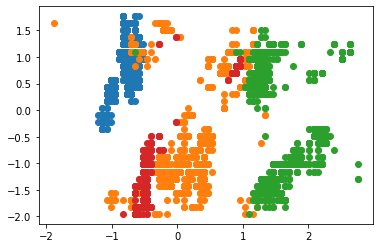

In [16]:
# k-means clustering
model = KMeans(n_clusters=4)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
labels = model.labels_
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# MeanShift Clustering model

model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# SpectralClustering model

model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

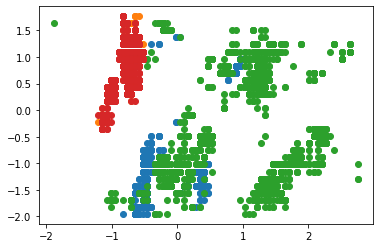

In [17]:
# GaussianMixture Model

model = GaussianMixture(n_components=4)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

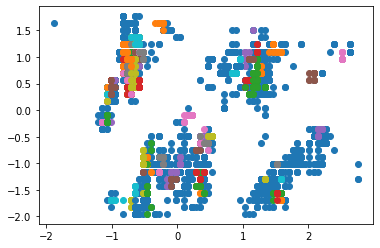

In [18]:
# OPTICS Clustering model

model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

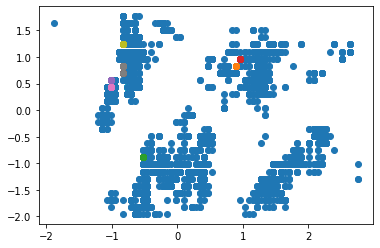

In [19]:
# DBSCAN model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()